# Importing the required modules

In [1]:
from sklearn import datasets
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np

# Loading the Boston Housing data

In [2]:
boston = datasets.load_boston()

### Data set description

In [3]:
for _ in boston['DESCR'].split('\n'):
    print(_)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
import simplere as re

In [5]:
header = re.match(boston['DESCR'], r'- [A-Z]+')[:-2]
header = [e[0] for e in header]
header = [s[2:] for s in header]
header_x = header[:13]
header_y = header[13]

In [6]:
X = pd.DataFrame(boston.data, columns=header_x)
y = pd.DataFrame(boston.target, columns=[header_y])

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
X_sub = X[['RM']]

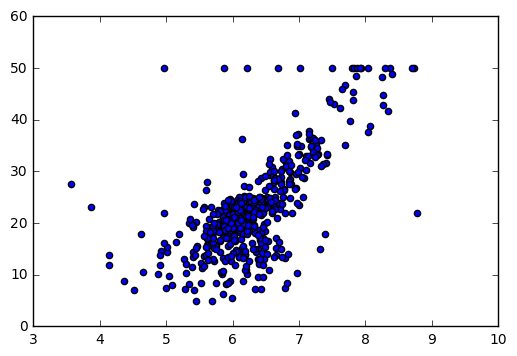

In [11]:
plt.scatter(X_sub['RM'], y['MEDV'])

# Splitting the dataset into training and testing sets

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Let us consider a single feature and test the idea

We shall be choosing the feature 'RM'

In [14]:
x_train = x_train[['RM']]
x_test = x_test[['RM']] 

In [38]:
def feature_info(dataset):
    '''
    Function which prints the required details in our dataset
    '''
    #print('Median : ' + str(np.median(dataset)))
    #print('Mean : ' + str(np.mean(dataset)))
    return np.median(dataset), np.mean(dataset)

In [39]:
X_median, X_mean = feature_info(X['RM'])

# Normal flow in cross validation

We split the data into k folds(in our case, 10), we then iterate through each fold treating it as a test set and all other folds as training set. We obtain the scores(in our case - R2 score) and pick the model which scores the highest.

In [59]:
def med_info_for(n, p_fig = True):
    kf = KFold(len(x_train), n_folds=n)
    models = []
    scores = []
    i = 0

    med_mean_list = []
    for train, test in kf:
        cur_validation = x_train.iloc[test]
        #print('Iteration ' + str(i))
        med_mean_list.append(feature_info(cur_validation.values))
        i += 1
        #print()
    
    med_median = np.median([med for med, mean in med_mean_list])
    if p_fig:
        plt.plot(list(range(len(med_mean_list))) , [med for med, mean in med_mean_list] )
        plt.axhline(y=X_median, color='red', linestyle='-')
        plt.axhline(y=med_median)
        plt.show()
    
    return med_median

In [59]:
def var_info_for(n, p_fig = True):
    kf = KFold(len(x_train), n_folds=n)
    i = 0

    var_list = []
    for train, test in kf:
        cur_validation = x_train.iloc[test]
        #print('Iteration ' + str(i))
        var_list.append(np.var(x_train))
        i += 1
        #print()
    
    var_median = np.median([med for med, mean in var_list])
    if p_fig:
        plt.plot(list(range(len(var_list))) , var_list )
        plt.axhline(y=X_median, color='red', linestyle='-')
        plt.axhline(y=med_median)
        plt.show()
    
    return var_median

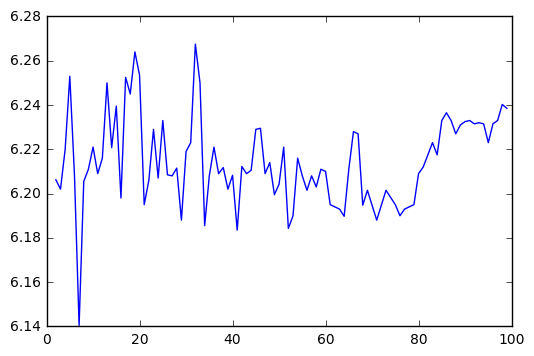

In [64]:
med_medians = []

for i in range(2, 100):
    #print('K value : ' + str(i))
    med_med = med_info_for(i, False)
    med_medians.append(med_med)
    
plt.plot(list(range(2, 100)), med_medians)

# But, what's the best value for k?

Surely, the results change depending on the value of k. So, what's the optimal value for k?

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
def plot_scores(score_vals, x_label, y_label):
    '''
    Plots the given score_vals array against it's index value + 1.
    x_label and y_label define the labels for x and y axis respectively
    '''
    x = list(range(len(score_vals)))
    x = [val+1 for val in x]
    plt.plot(x, score_vals)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

### Let's plot the graph of score at each iteration in k fold cross validation

We will observe that there is a lot of variation in the scores. 

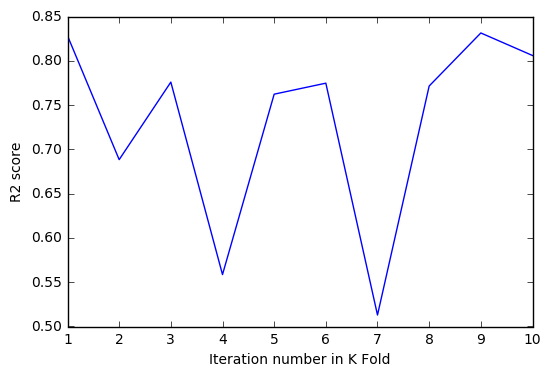

In [14]:
plot_scores(scores, 'Iteration number in K Fold', 'R2 score')

This variation in data is likely to increase as the value of k increases. 
We can illustrate this phenomenon here.

In [15]:
scores = []
for i in range(5, 50):
    sc = cross_val_score(estimator=LinearRegression(), X=x_train, y= y_train, cv=KFold(len(x_train), n_folds=i), n_jobs=-1)
    scores.append(sc)

In [16]:
score_var = [np.var(score) for score in scores]

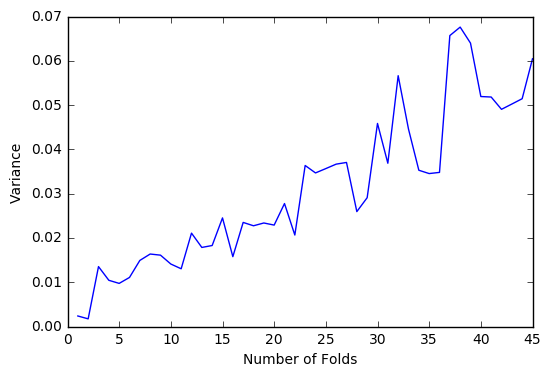

In [17]:
plot_scores(score_var, 'Number of Folds', 'Variance')

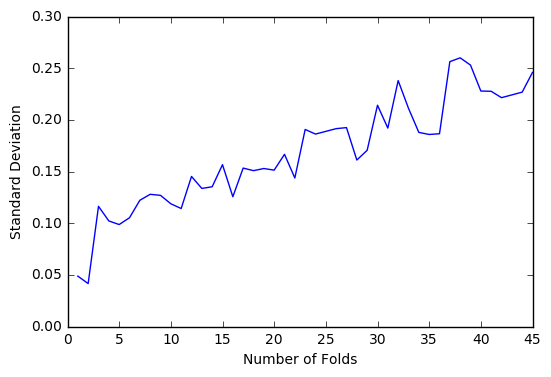

In [18]:
score_std = [np.std(score) for score in scores]
plot_scores(score_std, 'Number of Folds', 'Standard Deviation')

Let us now observe how the "best score"(the highest value for score obtained in a k fold cross validation) varies as the value of k increases

In [19]:
best_score = [np.max(score) for score in scores]

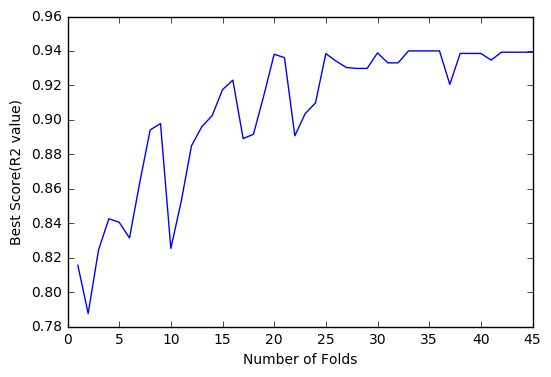

In [20]:
plot_scores(best_score, 'Number of Folds', 'Best Score(R2 value)')

# Residue

Let us define Residue as the difference between the best possible score(any evaluation metric, in our case the r2 score) and the obtained score.

In our case

$residue = 1 - bestScore$

(1 is the best possible R2 score)

Let us now see how residue changes as the k value increases

In [21]:
residue = [(1 - score) for score in best_score]

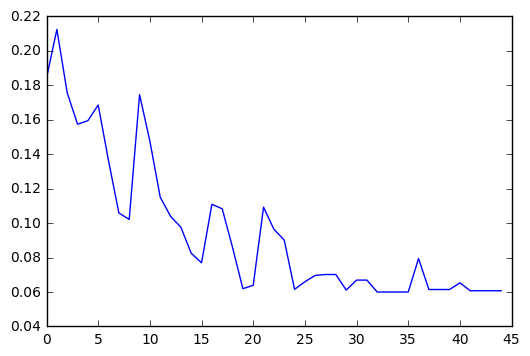

In [22]:
plt.plot(range(len(residue)), residue)

# Observations

There are two things we should note at this point
1. We want the residue to be as close to 0(i.e. as close to the best possible score) as possible.
2. We want the variance in the scores to be small as well. If the variance is too large, our model is more likely to be an overfit model.

Let us now introduce a new term which combined both variance and residue.

$combinedScore = variance + residue$

In [23]:
residue = np.array(residue)
score_var = np.array(score_var)

In [24]:
combined_score = residue + score_var

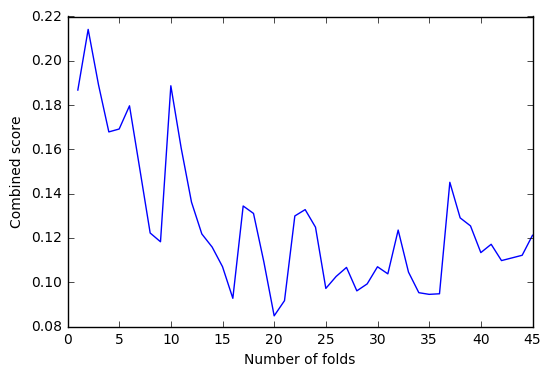

In [25]:
plot_scores(combined_score, 'Number of folds', 'Combined score')

# Average Score and how it varies

In [26]:
avg_scores = [np.mean(score) for score in scores]

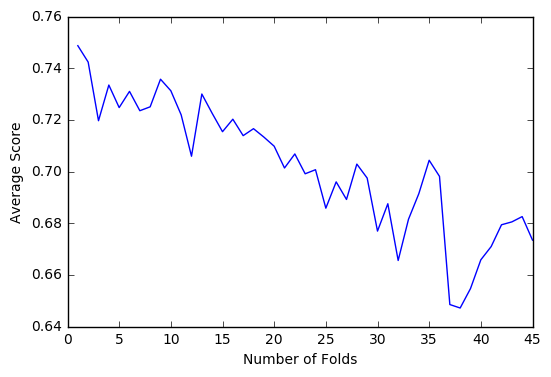

In [27]:
plot_scores(avg_scores, 'Number of Folds', 'Average Score')

In [44]:
X = np.array([i+1 for i in range(len(avg_scores))])
y = np.array(avg_scores)
#{i+1:[avg_scores[i]] for i in range(len(avg_scores))}

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
X.reshape(-1,1).reshape(1,-1).reshape(9,5)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40],
       [41, 42, 43, 44, 45]])

In [77]:
pf = PolynomialFeatures(degree=2)
X_2 = pf.fit_transform(X.reshape(-1,1))

reg = LinearRegression()
reg.fit(X_2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
reg.coef_

array([  0.00000000e+00,  -1.99931512e-03,   6.35059861e-06])

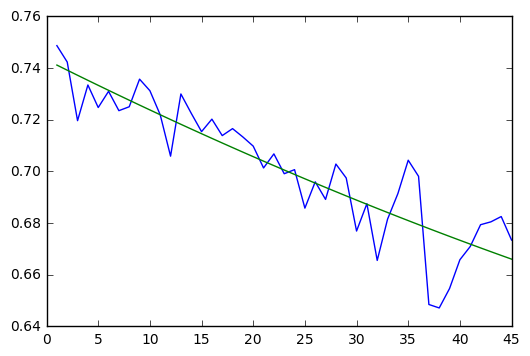

In [79]:
plt.plot(X, y)
plt.plot(X, reg.predict(X_2))

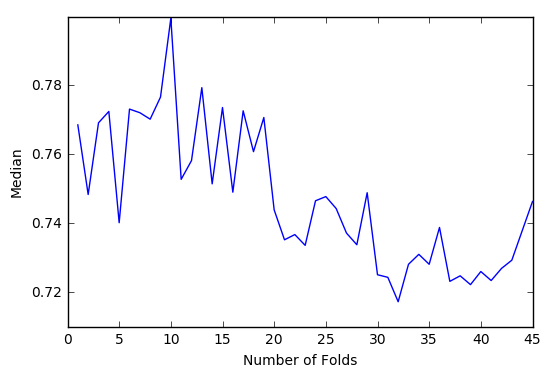

In [28]:
median_score = [np.median(score) for score in scores]
plot_scores(median_score, 'Number of Folds', 'Median')

# Desired "Combined Score" and its implications

$combinedScore = variance + residue$

We can infer the following this from the above equation
1. Combined score will be high if both variance and residue are high.
2. Combined score will be relatively low if either variance and residue are low.
3. Combined score will be the lowest when BOTH variance AND residue are low.

We are interested in the 3rd case mostly since it is desirable to have a small value for both variance and residue.

By looking at the above graph, we can observe the following
1. The combined score is very high initially, this is because the "residue" is high in those areas.
2. The combined score is very low in the middle of the graph. Here, both the variance and the residue are relatively low.
3. The combined score starts to increase again towards the right side of the graph. This is because the variance is higher around these regions.

Thus, we can have a look at the above graph and decide the best value for k.